## Marc Notebook

## 1) import usefuls module

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math 

from itertools import groupby
from helpers import *
from helpers_marc import *
from plots import *
import scipy
import scipy.io
import numpy as np
import scipy.sparse as sp

%load_ext autoreload
%autoreload 2

## 2) Load the data

In [2]:
# write here the path to the dataset
path_dataset = "../datasets/data_train.csv"

# load the data 
ratings = load_data(path_dataset)

number of items: 10000, number of users: 1000


## 3) Split the data 

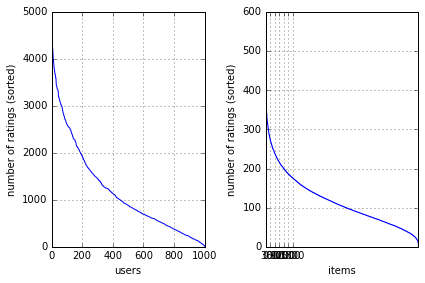

In [3]:
# First get the numbers of ratings per user and ratings per film 
# And plot these values

num_items_per_user, num_users_per_item = plot_raw_data(ratings)


In [4]:
# then select the items and users for which there are enough data
# and split the datan into a training set and a test set

# minimal number of data per user and per item
min_num_ratings = 10 

# fraction of the data set that will be the test set 
p_test = 0.5

valid_ratings, train, test = split_data(ratings, num_items_per_user, num_users_per_item, min_num_ratings, p_test)
# plot the resulting training and test set 
#valid_ratings = valid_ratings[:100,:100]


Total number of nonzero elements in origial data:1176952
Total number of nonzero elements in train data:589452
Total number of nonzero elements in test data:587421


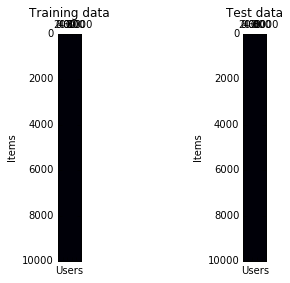

In [5]:
# new test cell
#train = train[:100,:100]
#test = test[:100,:100]
#print("ok")
plot_train_test_data(train, test)

## 4) Matrix Factorization through Stochastic Gradient Descent 

In [15]:
## Perform matrix factorization through stochastic gradient descent, for different numbers of features
# (grid search on the number of feature)
# keep the best number of feature, and the associated factorization

## Parameters for the matrix factorization
# maximum number of features fixed
max_K = 3

# incrementation step for K
step_K = 2

# number of full iterations of the stochastic gradient descent
max_epochs = 1

# regularization parameters (regularization of the loss function in Gradient Descent)
lambda_user = 1e-4
lambda_item = 1e-4

# descent step size
gamma = 0.1

# initialization of variables refering to the matrix factorization for the best number
best_rmse_test_sgd = float('Inf')
best_k_sgd = 0
best_user_feat_sgd = np.zeros(1)
best_item_feat_sgd = np.zeros(1)

# for each K of the grid, compute the matrix factorization (training set) and the rmse (test set), 
# If it improves the results, update the rmse

for K in range(2,max_K,step_K):
    
    print("matrix factorization for the number of features : ", K)
    
    # compute the stochastic gradient descent matrix factorization
    user_features, item_features, rmse_test = matrix_factorization_SGD(train, test, K, max_epochs, lambda_user, lambda_item, gamma)
    if rmse_test < best_rmse_test_sgd:
        # better rmse => update the references
        best_rmse_test_sgd = rmse_test
        best_k_sgd = K
        best_user_feat_sgd = user_features
        best_item_feat_sgd = item_features

# print the results
print("best number of features found : ", best_k_sgd)
print("rmse on the test set for this number of features : ", best_rmse_test_sgd)

matrix factorization for the number of features :  2
0.00025025025025
learn the matrix factorization using SGD...
iter: 0, RMSE on training set: 1.5223792661766111.
RMSE on test data: 1.5343891428465641.
best number of features found :  2
rmse on the test set for this number of features :  1.5343891428465641


In [17]:
# new test cell
predict = np.dot(np.transpose(best_user_feat_sgd),best_item_feat_sgd)
print("prediction matrix", predict[:10,:10])

prediction matrix [[ 3.94668896  3.99877292  2.93442447  2.95974889  1.97894177  4.47962859
   3.94782554  3.97598334  2.83815264  2.79078221]
 [ 3.99983284  4.07341087  2.98389335  2.99959159  2.01191343  4.61382112
   4.00197101  4.0288096   3.21693447  2.85966532]
 [ 3.99979547  4.03150033  2.96381688  2.99958695  1.99915864  4.46501351
   3.99994743  4.03020596  2.53107347  2.79659845]
 [ 4.00025042  4.18063763  3.03534155  2.99984508  2.04460837  4.99374712
   4.00745484  4.02557257  4.96657647  3.02075642]
 [ 3.99962516  4.0308356   2.9634546   2.99945951  1.99892354  4.46307162
   3.99975373  4.03005125  2.5228897   2.79573705]
 [ 4.00045826  4.18249796  3.03628598  3.00000002  2.04521438  4.99984425
   4.00774099  4.02572545  4.99374727  3.02338713]
 [ 3.99925881  4.12844171  3.01009385  2.99913004  2.02854077  4.81074943
   4.00403474  4.02632675  4.12740013  2.94298545]
 [ 3.99996204  4.18123877  3.03555486  2.99962831  2.04473549  4.9965936
   4.00720875  4.02525145  4.98100

## 5) Matrix Factorization Using alternative Least Square Method 

In [1]:
## Perform matrix factorization through stochastic gradient descent, for different numbers of features
# (grid search on the number of feature)
# keep the best number of feature, and the associated factorization

## Parameters for the matrix factorization
# maximum number of features fixed
max_K = 6

# incrementation step for K
step_K = 1

# regularization parameters for the loss function 
lambda_user = 1e-8
lambda_item = 1e-8

# stop criterion
stop_criterion = 1e-3

# number of iterations of the alternative least squares method 
it_max = 10

# initialization of variables refering to the matrix factorization for the best number
best_rmse_test_als = float('Inf')
best_k_als = 0
best_user_feat_als = np.zeros(1)
best_item_feat_als = np.zeros(1)

for K in range(1,max_K,step_K):
    
    print("als matrix factorization for the number of features : ", K)
    
    # compute the matrix factorization using alternative least squares method
    user_features, item_features, rmse_test =ALS(train, test,K, lambda_user, lambda_item, stop_criterion, it_max)
    print("rmse on test data for ", K, " features : ", rmse_test)
    if rmse_test < best_rmse_test_als:
        # better rmse => update the references
        best_rmse_test_als = rmse_test
        best_k_als = K
        best_user_feat_als = user_features
        best_item_feat_als = item_features
        
# print the results
print("best number of features found : ", best_k_als)
print("rmse on the test set for this number of features : ", best_rmse_test_als)

NameError: name 'np' is not defined

## 6) Prediction using SGD Matrix Factorization

number of items: 10000, number of users: 1000


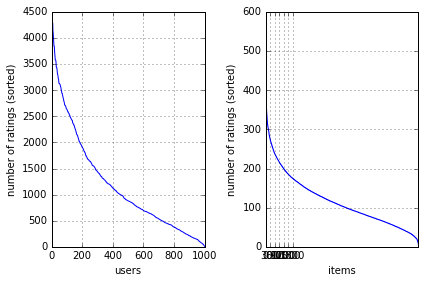

ok


In [2]:
### Prediction using the SGD Matrix Factorization best parameters found previously 

# load the submission data set 
# write here the path to the dataset
path_dataset_submit = "../datasets/sampleSubmission.csv"

# load the data 
ratings_submit = load_data(path_dataset_submit)
num_items_per_user, num_users_per_item = plot_raw_data(ratings_submit)

#ratings_submit = ratings_submit[:30,:50]
print("ok")

In [3]:
# Need to apply the same transformation and keep only in the training set the items,users for which there are at least
# a certain amount of information => train_submit : FALSE => UNCOMPATIBLE SHAPE
#min_num_ratings = 10
#dummy_valid_ratings_submit, train_submit, dummy_test_submit = split_data(ratings_submit, num_items_per_user, num_users_per_item, min_num_ratings, 0)
print("ok")

ok


In [5]:
# SAME PARAMETERS AS DURING THE TRAINING
# number of full iterations of the stochastic gradient descent
max_epochs =20

# regularization parameters (regularization of the loss function in Gradient Descent)
lambda_user = 1e-3
lambda_item = 1e-7

# descent step size
gamma = 0.1
#ratings_submit = ratings_submit[:1000,:1000]
# size of the rating matrix
d,n = ratings_submit.shape
print("d,n :", d,n)
# for test only 
best_k_sgd = 5

# compute the prediction matrix 
# => directly use the ratings matrix as rating as training set 
user_features_submit_sgd, item_features_submit_sgd, rmse_full_ratings = matrix_factorization_SGD(ratings_submit, ratings_submit, best_k_sgd, max_epochs, lambda_user, lambda_item, gamma)

# print : rmse of our full prediction : 
print("rmse of our prediction : ", rmse_full_ratings)

d,n : 10000 1000
learn the matrix factorization using SGD...
iter: 0, RMSE on training set: 0.04511382239508148.


KeyboardInterrupt: 